In [1]:
import numpy as np
import pandas as pd

In [99]:
pd.options.display.max_rows = 4000

In [2]:
Cus_Acq=pd.read_csv("D:/Analytixlabs Data/Module 5 - Python Foundation/Case Studies/4. Pandas Case Study 2 - Credit Card Case Study/Customer Acqusition.csv")

In [3]:
Cus_Acq.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [4]:
Cus_Acq.dtypes

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [5]:
Spend=pd.read_csv("D:/Analytixlabs Data/Module 5 - Python Foundation/Case Studies/4. Pandas Case Study 2 - Credit Card Case Study/spend.csv")

In [6]:
Spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [7]:
Spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [8]:
Spend["Month"]=pd.to_datetime(Spend["Month"])

In [9]:
Spend.dtypes

Sl No:               int64
Customer            object
Month       datetime64[ns]
Type                object
Amount             float64
dtype: object

In [10]:
Repayment=pd.read_csv("D:/Analytixlabs Data/Module 5 - Python Foundation/Case Studies/4. Pandas Case Study 2 - Credit Card Case Study/Repayment.csv")

In [11]:
Repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [12]:
Repayment.dtypes

SL No:        float64
Customer       object
Month          object
Amount        float64
Unnamed: 4    float64
dtype: object

In [13]:
Repayment.drop("Unnamed: 4",axis=1,inplace=True)

In [14]:
Repayment.dropna(axis=0,how="all",inplace=True)

In [15]:
Repayment

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77
1496,1497.0,A68,10-May-06,319836.49
1497,1498.0,A69,11-Jul-06,247628.45
1498,1499.0,A70,12-Aug-05,454016.51


In [16]:
Repayment["Month"]=pd.to_datetime(Repayment["Month"])

In [17]:
Repayment.dtypes

SL No:             float64
Customer            object
Month       datetime64[ns]
Amount             float64
dtype: object

# 1. In the above dataset,
## a. In case age is less than 18, replace it with mean of age values.
## b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.(customer’s limit provided in acquisition table is the per transaction limit on his card)
## c. Incase the repayment amount is more than the limit, replace the repayment with the limit.



## 1(a) In case age is less than 18, replace it with mean of age values.

In [18]:
Cus_Acq.loc[Cus_Acq["Age"]<18,'Age']=Cus_Acq.Age.mean()

In [19]:
Cus_Acq.Age.min()

19.0

## 1(b) In case spend amount is more than the limit, replace it with 50% of that customer’s limit.(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [20]:
Cus_Acq.shape

(100, 8)

In [21]:
Spend.shape

(1500, 5)

In [22]:
Customer_spend=pd.merge(left=Spend,right=Cus_Acq,how="left",on="Customer")

In [23]:
Customer_spend

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,2004-01-03,PETRO,410556.13,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,2004-01-25,FOOD,484342.47,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497,A68,2006-03-25,BUS TICKET,204971.10,68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498,A69,2006-03-31,BUS TICKET,50449.44,69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499,A70,2006-03-23,BUS TICKET,80593.94,70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed


In [24]:
Customer_spend[Customer_spend['Amount'] > Customer_spend['Limit']]

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
7,8,A8,2004-02-05,BIKE,155562.58,8,67.00,PATNA,Silver,100002.0,C8,Salaried_Pvt
18,19,A19,2005-04-04,FOOD,441442.26,19,27.00,BANGALORE,Platimum,10000.0,C19,Salaried_Pvt
19,20,A20,2006-04-30,JEWELLERY,356733.48,20,27.00,CALCUTTA,Platimum,10001.0,C20,Govt
20,21,A21,2004-04-25,PETRO,190011.63,21,57.00,COCHIN,Platimum,10002.0,C21,Normal Salary
21,22,A22,2006-04-19,CLOTHES,423672.50,22,27.00,BOMBAY,Silver,100000.0,C22,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1486,A59,2004-01-15,FOOD,181115.20,59,74.00,BANGALORE,Silver,100003.0,C21,Normal Salary
1496,1497,A68,2006-03-25,BUS TICKET,204971.10,68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498,A69,2006-03-31,BUS TICKET,50449.44,69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499,A70,2006-03-23,BUS TICKET,80593.94,70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed


In [25]:
#if customer's spend amount is more than the limit,replacing with 50% of that customer’s limit

In [26]:
Customer_spend.loc[Customer_spend['Amount'] > Customer_spend['Limit'],'Amount'] = (50 * Customer_spend["Limit"]).div(100)

In [27]:
Customer_spend.head(8)

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,2004-01-03,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,2004-01-25,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
5,6,A1,2005-02-23,SANDALS,168285.60,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
6,7,A1,2005-02-01,CAR,23370.20,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
7,8,A8,2004-02-05,BIKE,50001.00,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt


## 1(c)  Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [28]:
cust_repayment=pd.merge(left=Repayment,right=Cus_Acq,how="left",on="Customer")

In [29]:
cust_repayment

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,2004-01-12,495414.75,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,2004-01-03,245899.02,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,2004-01-15,259490.06,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,2004-01-25,437555.12,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,2005-01-17,165972.88,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...
1495,1496.0,A67,2005-05-09,55638.77,67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497.0,A68,2006-05-10,319836.49,68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498.0,A69,2006-07-11,247628.45,69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499.0,A70,2005-08-12,454016.51,70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed


In [30]:
cust_repayment[cust_repayment['Amount'] > cust_repayment['Limit']]

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
7,8.0,A8,2004-02-05,156913.59,8,67.00,PATNA,Silver,100002.0,C8,Salaried_Pvt
8,9.0,A9,2005-02-28,417294.81,9,79.00,CHENNAI,Silver,100003.0,C9,Govt
17,18.0,A18,2006-03-05,213352.06,18,34.00,BANGALORE,Silver,100000.0,C18,Salaried_MNC
18,19.0,A19,2005-04-04,347826.27,19,27.00,BANGALORE,Platimum,10000.0,C19,Salaried_Pvt
19,20.0,A20,2006-04-30,471099.22,20,27.00,CALCUTTA,Platimum,10001.0,C20,Govt
...,...,...,...,...,...,...,...,...,...,...,...
1483,1484.0,A57,2004-03-19,207786.09,57,37.00,TRIVANDRUM,Silver,100001.0,C19,Normal Salary
1496,1497.0,A68,2006-05-10,319836.49,68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498.0,A69,2006-07-11,247628.45,69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499.0,A70,2005-08-12,454016.51,70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed


In [31]:
cust_repayment.loc[cust_repayment['Amount'] > cust_repayment['Limit'],'Amount'] = cust_repayment['Limit']/2

In [32]:
cust_repayment.head(8)

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,2004-01-12,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,2004-01-03,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,2004-01-15,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,2004-01-25,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,2005-01-17,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
5,6.0,A1,2005-02-23,365366.62,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
6,7.0,A1,2005-02-01,14473.41,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
7,8.0,A8,2004-02-05,50001.00,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt


# 2. From the above dataset create the following summaries:
## a. How many distinct customers exist?
## b. How many distinct categories exist?
## c. What is the average monthly spend by customers?
## d. What is the average monthly repayment by customers?
## e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
## (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)
## f. What are the top 5 product types?
## g. Which city is having maximum spend?
## h. Which age group is spending more money?
## i. Who are the top 10 customers in terms of repayment?

## 2(a) How many distinct customers exist?

In [33]:
len(Cus_Acq['Customer'].unique())

100

## 2(b) How many distinct categories exist?

In [34]:
Cus_Acq['Segment'].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

In [35]:
Cus_Acq['Segment'].nunique()

5

## 2(c) What is the average monthly spend by customers?

In [36]:
Spend['Monthly'] = Spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))

In [37]:
Spend['Yearly'] = Spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [38]:
Spend

,Sl No:,Customer,Month,Type,Amount,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,4,A1,2004-01-25,FOOD,484342.47,January,2004
4,5,A1,2005-01-17,CAMERA,369694.07,January,2005
...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,February,2006
1496,1497,A68,2006-03-25,BUS TICKET,204971.10,March,2006
1497,1498,A69,2006-03-31,BUS TICKET,50449.44,March,2006
1498,1499,A70,2006-03-23,BUS TICKET,80593.94,March,2006


In [39]:
cust_spend_monthly=round(Spend.groupby(['Yearly','Monthly'])['Amount'].mean(),2)

In [40]:
cust_spend_monthly

Yearly  Monthly  
2004    April        235272.04
        February     221215.27
        January      251712.07
        March        232146.12
        May          217539.24
        November     270486.40
        September    310923.38
2005    April        252181.33
        August       233734.63
        December     147503.06
        February     229802.28
        January      292741.37
        July         229116.66
        June         262688.11
        May          245696.52
        November     286143.32
        October      194568.64
        September    188666.20
2006    April        232468.97
        August       240699.72
        December     270470.98
        February     253858.26
        January      282058.01
        July         287505.10
        June         177252.39
        March        247166.08
        May          236162.74
        November     182841.29
        October      236136.33
        September    158520.09
Name: Amount, dtype: float64

## 2(d) What is the average monthly repayment by customers?

In [41]:
Repayment

,SL No:,Customer,Month,Amount
0,NaN,A1,2004-01-12,495414.75
1,2.0,A1,2004-01-03,245899.02
2,3.0,A1,2004-01-15,259490.06
3,4.0,A1,2004-01-25,437555.12
4,5.0,A1,2005-01-17,165972.88
...,...,...,...,...
1495,1496.0,A67,2005-05-09,55638.77
1496,1497.0,A68,2006-05-10,319836.49
1497,1498.0,A69,2006-07-11,247628.45
1498,1499.0,A70,2005-08-12,454016.51


In [42]:
Repayment.dtypes

SL No:             float64
Customer            object
Month       datetime64[ns]
Amount             float64
dtype: object

In [43]:
Repayment['Monthly'] = Repayment['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
Repayment['Yearly'] = Repayment['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [44]:
Repayment

,SL No:,Customer,Month,Amount,Monthly,Yearly
0,NaN,A1,2004-01-12,495414.75,January,2004
1,2.0,A1,2004-01-03,245899.02,January,2004
2,3.0,A1,2004-01-15,259490.06,January,2004
3,4.0,A1,2004-01-25,437555.12,January,2004
4,5.0,A1,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...
1495,1496.0,A67,2005-05-09,55638.77,May,2005
1496,1497.0,A68,2006-05-10,319836.49,May,2006
1497,1498.0,A69,2006-07-11,247628.45,July,2006
1498,1499.0,A70,2005-08-12,454016.51,August,2005


In [45]:
customer_repay_monthly= round(Repayment.groupby(['Yearly','Monthly'])['Amount'].mean(),2)

In [46]:
customer_repay_monthly

Yearly  Monthly  
2004    April        259141.68
        February     256702.63
        January      243489.65
        March        252585.28
        May          226162.72
        November     209592.24
        September    184487.85
2005    April        212688.63
        August       264430.92
        December     320379.34
        February     238829.27
        January      240548.10
        July         239871.48
        June         210199.82
        May          263207.37
        November     256695.12
        October      219849.96
        September    247700.17
2006    April        275472.25
        August       224143.99
        December     252736.57
        February     284489.57
        January      293475.39
        July         257936.38
        June         251990.45
        March        240851.27
        May          256920.88
        November     199399.20
        October      260765.48
        September    262533.88
Name: Amount, dtype: float64

## 2(e) If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [47]:
Repayment.head(1)

,SL No:,Customer,Month,Amount,Monthly,Yearly
0,NaN,A1,2004-01-12,495414.75,January,2004


In [48]:
Spend.head(1)

,Sl No:,Customer,Month,Type,Amount,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.8,January,2004


In [49]:
Cus_Acq.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [50]:
spend_repay=pd.merge(left=Spend,right=Repayment,how='inner',on='Customer')

In [51]:
spend_repay

,Sl No:,Customer,Month_x,Type,Amount_x,Monthly_x,Yearly_x,SL No:,Month_y,Amount_y,Monthly_y,Yearly_y
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004,NaN,2004-01-12,495414.75,January,2004
1,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004,2.0,2004-01-03,245899.02,January,2004
2,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004,3.0,2004-01-15,259490.06,January,2004
3,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004,4.0,2004-01-25,437555.12,January,2004
4,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004,5.0,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
37279,349,A7,2006-04-19,JEWELLERY,165956.43,April,2006,277.0,2005-11-22,55108.71,November,2005
37280,349,A7,2006-04-19,JEWELLERY,165956.43,April,2006,295.0,2005-12-03,429700.12,December,2005
37281,349,A7,2006-04-19,JEWELLERY,165956.43,April,2006,313.0,2005-02-23,344628.72,February,2005
37282,349,A7,2006-04-19,JEWELLERY,165956.43,April,2006,331.0,2006-03-31,336264.37,March,2006


In [52]:
interest=spend_repay.groupby(['Yearly_y','Monthly_y'])[['Amount_x','Amount_y']].sum()

In [53]:
interest['Monthly Profit'] = interest['Amount_y'] - interest['Amount_x']

In [54]:
interest

Amount_x      Amount_y  Monthly Profit
Yearly_y Monthly_y                                            
2004     April      2.108042e+08  2.285403e+08    1.773603e+07
         February   1.562344e+08  1.602419e+08    4.007528e+06
         January    1.715187e+09  1.699210e+09   -1.597793e+07
         March      8.258765e+07  8.974470e+07    7.157050e+06
         May        1.526538e+08  1.411594e+08   -1.149442e+07
         November   9.226463e+07  7.860290e+07   -1.366174e+07
         September  9.702432e+07  8.016122e+07   -1.686310e+07
2005     April      2.018261e+08  1.747894e+08   -2.703662e+07
         August     2.345989e+08  2.477449e+08    1.314604e+07
         December   7.186922e+07  9.944533e+07    2.757611e+07
         February   9.701575e+08  9.416163e+08   -2.854123e+07
         January    1.766266e+08  1.810333e+08    4.406752e+06
         July       8.534751e+07  7.997268e+07   -5.374832e+06
         June       2.570007e+08  2.213774e+08   -3.562332e+07
         May        9.714766e+08  1.099197e+09    1.277209e+08
         November   2.611733e+08  2.763119e+08    1.513861e+07
         October    6.731423e+07  6.027830e+07   -7.035934e+06
         September  7.650695e+07  7.530449e+07   -1.202455e+06
2006     April      5.407409e+08  6.093666e+08    6.862567e+07
         August     7.830972e+07  7.167032e+07   -6.639403e+06
         December   7.075219e+07  7.087702e+07    1.248300e+05
         February   2.493959e+08  2.903280e+08    4.093202e+07
         January    7.601514e+07  8.974491e+07    1.372977e+07
         July       2.068412e+08  2.245720e+08    1.773086e+07
         June       6.835844e+07  6.914431e+07    7.858731e+05
         March      1.133065e+09  1.115725e+09   -1.733988e+07
         May        5.012534e+08  5.434823e+08    4.222888e+07
         November   1.699466e+08  1.355832e+08   -3.436340e+07
         October    7.381523e+07  7.890924e+07    5.094012e+06
         September  7.730422e+07  8.083199e+07    3.527766e+06

In [55]:
interest['Interest Earned'] = round((2.9* interest['Monthly Profit'])/100,2)

In [56]:
interest

Amount_x      Amount_y  Monthly Profit  \
Yearly_y Monthly_y                                               
2004     April      2.108042e+08  2.285403e+08    1.773603e+07   
         February   1.562344e+08  1.602419e+08    4.007528e+06   
         January    1.715187e+09  1.699210e+09   -1.597793e+07   
         March      8.258765e+07  8.974470e+07    7.157050e+06   
         May        1.526538e+08  1.411594e+08   -1.149442e+07   
         November   9.226463e+07  7.860290e+07   -1.366174e+07   
         September  9.702432e+07  8.016122e+07   -1.686310e+07   
2005     April      2.018261e+08  1.747894e+08   -2.703662e+07   
         August     2.345989e+08  2.477449e+08    1.314604e+07   
         December   7.186922e+07  9.944533e+07    2.757611e+07   
         February   9.701575e+08  9.416163e+08   -2.854123e+07   
         January    1.766266e+08  1.810333e+08    4.406752e+06   
         July       8.534751e+07  7.997268e+07   -5.374832e+06   
         June       2.570007e+08  2.213774e+08   -3.562332e+07   
         May        9.714766e+08  1.099197e+09    1.277209e+08   
         November   2.611733e+08  2.763119e+08    1.513861e+07   
         October    6.731423e+07  6.027830e+07   -7.035934e+06   
         September  7.650695e+07  7.530449e+07   -1.202455e+06   
2006     April      5.407409e+08  6.093666e+08    6.862567e+07   
         August     7.830972e+07  7.167032e+07   -6.639403e+06   
         December   7.075219e+07  7.087702e+07    1.248300e+05   
         February   2.493959e+08  2.903280e+08    4.093202e+07   
         January    7.601514e+07  8.974491e+07    1.372977e+07   
         July       2.068412e+08  2.245720e+08    1.773086e+07   
         June       6.835844e+07  6.914431e+07    7.858731e+05   
         March      1.133065e+09  1.115725e+09   -1.733988e+07   
         May        5.012534e+08  5.434823e+08    4.222888e+07   
         November   1.699466e+08  1.355832e+08   -3.436340e+07   
         October    7.381523e+07  7.890924e+07    5.094012e+06   
         September  7.730422e+07  8.083199e+07    3.527766e+06   

                    Interest Earned  
Yearly_y Monthly_y                   
2004     April            514344.89  
         February         116218.32  
         January         -463360.05  
         March            207554.45  
         May             -333338.04  
         November        -396190.39  
         September       -489029.95  
2005     April           -784061.85  
         August           381235.09  
         December         799707.30  
         February        -827695.65  
         January          127795.82  
         July            -155870.13  
         June           -1033076.35  
         May             3703905.42  
         November         439019.65  
         October         -204042.09  
         September        -34871.20  
2006     April           1990144.54  
         August          -192542.70  
         December           3620.07  
         February        1187028.64  
         January          398163.40  
         July             514195.06  
         June              22790.32  
         March           -502856.65  
         May             1224637.63  
         November        -996538.47  
         October          147726.36  
         September        102305.21

In [57]:
interest.rename(columns={"Amount_x":"Spend_Amount","Amount_y":"Repay_Amount"},inplace=True)

In [58]:
interest

Spend_Amount  Repay_Amount  Monthly Profit  \
Yearly_y Monthly_y                                               
2004     April      2.108042e+08  2.285403e+08    1.773603e+07   
         February   1.562344e+08  1.602419e+08    4.007528e+06   
         January    1.715187e+09  1.699210e+09   -1.597793e+07   
         March      8.258765e+07  8.974470e+07    7.157050e+06   
         May        1.526538e+08  1.411594e+08   -1.149442e+07   
         November   9.226463e+07  7.860290e+07   -1.366174e+07   
         September  9.702432e+07  8.016122e+07   -1.686310e+07   
2005     April      2.018261e+08  1.747894e+08   -2.703662e+07   
         August     2.345989e+08  2.477449e+08    1.314604e+07   
         December   7.186922e+07  9.944533e+07    2.757611e+07   
         February   9.701575e+08  9.416163e+08   -2.854123e+07   
         January    1.766266e+08  1.810333e+08    4.406752e+06   
         July       8.534751e+07  7.997268e+07   -5.374832e+06   
         June       2.570007e+08  2.213774e+08   -3.562332e+07   
         May        9.714766e+08  1.099197e+09    1.277209e+08   
         November   2.611733e+08  2.763119e+08    1.513861e+07   
         October    6.731423e+07  6.027830e+07   -7.035934e+06   
         September  7.650695e+07  7.530449e+07   -1.202455e+06   
2006     April      5.407409e+08  6.093666e+08    6.862567e+07   
         August     7.830972e+07  7.167032e+07   -6.639403e+06   
         December   7.075219e+07  7.087702e+07    1.248300e+05   
         February   2.493959e+08  2.903280e+08    4.093202e+07   
         January    7.601514e+07  8.974491e+07    1.372977e+07   
         July       2.068412e+08  2.245720e+08    1.773086e+07   
         June       6.835844e+07  6.914431e+07    7.858731e+05   
         March      1.133065e+09  1.115725e+09   -1.733988e+07   
         May        5.012534e+08  5.434823e+08    4.222888e+07   
         November   1.699466e+08  1.355832e+08   -3.436340e+07   
         October    7.381523e+07  7.890924e+07    5.094012e+06   
         September  7.730422e+07  8.083199e+07    3.527766e+06   

                    Interest Earned  
Yearly_y Monthly_y                   
2004     April            514344.89  
         February         116218.32  
         January         -463360.05  
         March            207554.45  
         May             -333338.04  
         November        -396190.39  
         September       -489029.95  
2005     April           -784061.85  
         August           381235.09  
         December         799707.30  
         February        -827695.65  
         January          127795.82  
         July            -155870.13  
         June           -1033076.35  
         May             3703905.42  
         November         439019.65  
         October         -204042.09  
         September        -34871.20  
2006     April           1990144.54  
         August          -192542.70  
         December           3620.07  
         February        1187028.64  
         January          398163.40  
         July             514195.06  
         June              22790.32  
         March           -502856.65  
         May             1224637.63  
         November        -996538.47  
         October          147726.36  
         September        102305.21

## 2(f) What are the top 5 product types?

In [59]:
Spend['Type'].value_counts().head(5)

PETRO           200
CAMERA          160
FOOD            160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

## 2(g) Which city is having maximum spend?

In [60]:
Customer_spend

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,2004-01-03,PETRO,410556.13,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,2004-01-25,FOOD,484342.47,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497,A68,2006-03-25,BUS TICKET,50000.00,68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498,A69,2006-03-31,BUS TICKET,5000.00,69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499,A70,2006-03-23,BUS TICKET,5000.50,70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed


In [61]:
Customer_spend.groupby(by='City')['Amount'].sum().sort_values(ascending=False)

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

## 2(h) Which age group is spending more money?

In [62]:
Customer_spend.groupby('Age')['Amount'].sum().sort_values(ascending=False)

Age
28.00    17365270.23
46.49    15872551.38
78.00    12329508.54
37.00     9992645.71
25.00     9749700.72
51.00     9670808.79
47.00     9157809.12
44.00     9002326.39
29.00     8231607.26
50.00     8082803.39
67.00     7840760.08
21.00     7662247.39
24.00     6948235.19
38.00     6876389.81
36.00     6491191.06
60.00     6346711.02
72.00     6051138.76
35.00     5980154.00
52.00     5656608.44
43.00     5252438.32
76.00     5142702.76
39.00     4891474.75
54.00     4458771.82
46.00     4368194.79
41.00     3650955.67
63.00     3528482.07
27.00     1859124.07
34.00     1781962.38
61.00     1559253.89
49.00     1506267.31
53.00     1353183.28
77.00     1346771.77
71.00     1007945.92
74.00     1002195.63
32.00      992781.50
70.00      932200.20
79.00      904520.69
59.00      902108.49
69.00      871636.85
26.00      803699.35
55.00      757179.90
56.00      382522.09
31.00      312714.37
62.00      240401.50
65.00      175659.72
57.00      169992.36
42.00      155015.50
19.00    

## 2(i) Who are the top 10 customers in terms of repayment?

In [63]:
cust_repayment.groupby("Customer")[["Amount"]].sum().sort_values(by="Amount",ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [64]:
Customer_spend

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,2004-01-03,PETRO,410556.13,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,2004-01-25,FOOD,484342.47,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497,A68,2006-03-25,BUS TICKET,50000.00,68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498,A69,2006-03-31,BUS TICKET,5000.00,69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499,A70,2006-03-23,BUS TICKET,5000.50,70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed


In [65]:
Customer_spend['Year'] = Customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [66]:
Customer_spend.head(1)

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,Year
0,1,A1,2004-01-12,JEWELLERY,485470.8,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004


In [67]:
city_spend=Customer_spend.groupby(['City','Year','Product'])['Amount'].sum()

In [68]:
city_spend=city_spend.reset_index(drop=False)

In [69]:
customer_spend_pivot=pd.pivot_table(data=city_spend,index=['City','Year'],columns='Product',values='Amount',aggfunc="sum")

In [70]:
customer_spend_pivot

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

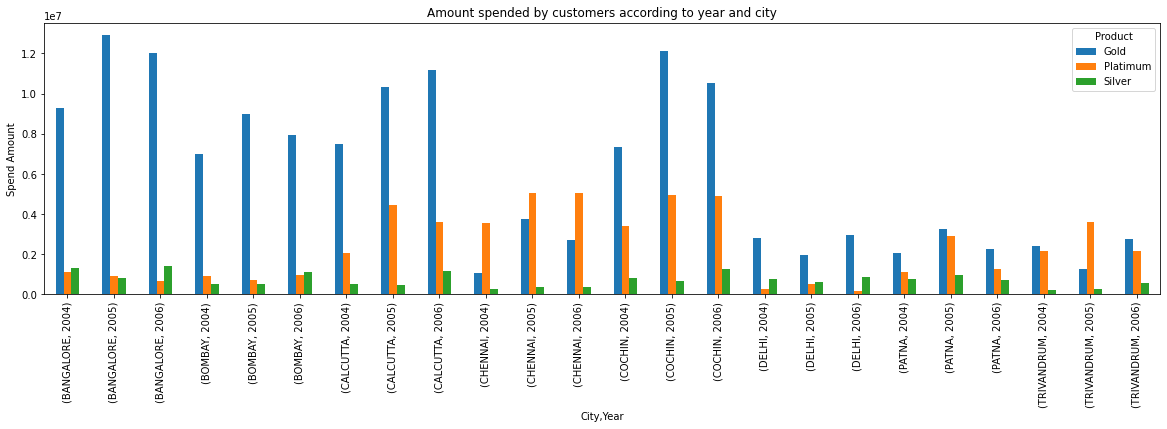

In [72]:
customer_spend_pivot.plot(kind='bar',figsize=(20,5))
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to year and city")
plt.show()

# 4. Create graphs for
## a. Monthly comparison of total spends, city wise
## b. Comparison of yearly spend on air tickets
## c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

## 4(a) :  Monthly comparison of total spends, city wise

In [73]:
Customer_spend

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,Year
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004
1,2,A1,2004-01-03,PETRO,410556.13,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004
3,4,A1,2004-01-25,FOOD,484342.47,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary,2006
1496,1497,A68,2006-03-25,BUS TICKET,50000.00,68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed,2006
1497,1498,A69,2006-03-31,BUS TICKET,5000.00,69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed,2006
1498,1499,A70,2006-03-23,BUS TICKET,5000.50,70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed,2006


In [74]:
Customer_spend['Monthly'] = Customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))

In [75]:
Customer_spend.head(1)

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,Year,Monthly
0,1,A1,2004-01-12,JEWELLERY,485470.8,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004,January


In [76]:
month_city = Customer_spend.groupby(["Monthly","City"])[["Amount"]].sum().sort_index().reset_index()

In [77]:
month_city

,Monthly,City,Amount
0,April,BANGALORE,4207980.48
1,April,BOMBAY,1873785.01
2,April,CALCUTTA,3457507.95
3,April,CHENNAI,2518656.99
4,April,COCHIN,3882744.94
...,...,...,...
91,September,CHENNAI,745759.40
92,September,COCHIN,1382242.90
93,September,DELHI,50001.00
94,September,PATNA,70329.95


In [78]:
month_city_pivot=pd.pivot_table(data=month_city,index='City',columns='Monthly',values='Amount',aggfunc='sum')

In [79]:
month_city_pivot

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


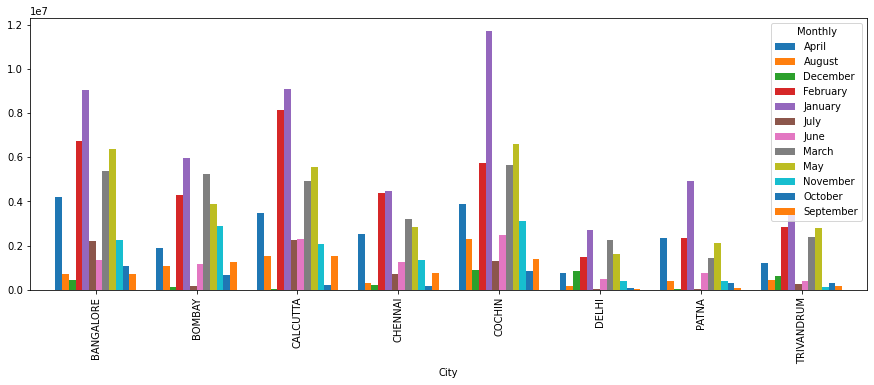

In [80]:
month_city_pivot.plot(kind='bar',figsize=(15,5),width=0.8)

## 4(b) Comparison of yearly spend on air tickets

In [81]:
Customer_spend.head()

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,Year,Monthly
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004,January
1,2,A1,2004-01-03,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004,January
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004,January
3,4,A1,2004-01-25,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004,January
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005,January


In [82]:
air_tickets = Customer_spend.groupby(["Year","Type"])[["Amount"]].sum().reset_index()

In [83]:
air_tickets.head()

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
1,2004,AUTO,254745.28
2,2004,BIKE,476635.28
3,2004,BUS TICKET,5822074.21
4,2004,CAMERA,10122819.72


In [84]:
air_tickets = air_tickets.loc[air_tickets["Type"]=="AIR TICKET"]

In [85]:
air_tickets

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


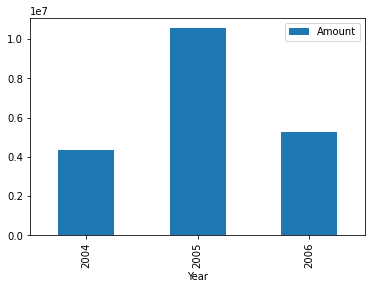

In [86]:
air_tickets.plot(kind='bar',x='Year',y='Amount')

## 4(c) Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [87]:
product_wise = pd.pivot_table(data=Customer_spend,index='Product',columns='Monthly',values='Amount',aggfunc='sum')

In [88]:
product_wise

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


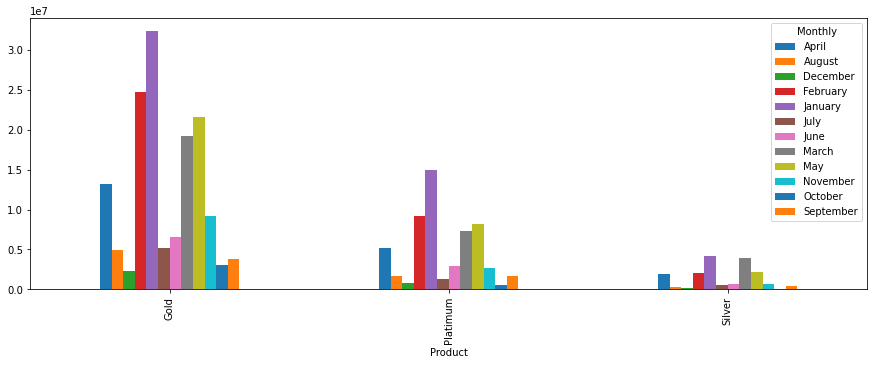

In [89]:
product_wise.plot(kind='bar',figsize=(15,5))

# (5) Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [90]:
Customer_spend

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,Year,Monthly
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004,January
1,2,A1,2004-01-03,PETRO,410556.13,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004,January
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004,January
3,4,A1,2004-01-25,FOOD,484342.47,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004,January
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2005,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary,2006,February
1496,1497,A68,2006-03-25,BUS TICKET,50000.00,68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed,2006,March
1497,1498,A69,2006-03-31,BUS TICKET,5000.00,69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed,2006,March
1498,1499,A70,2006-03-23,BUS TICKET,5000.50,70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed,2006,March


In [104]:
(Customer_spend[Customer_spend['Product']=='Silver']).groupby(['Product','Monthly','City','Customer'])['Amount'].sum()

Product  Monthly    City        Customer
Silver   April      BANGALORE   A23         150001.50
                                A59          50001.50
                    BOMBAY      A22         308987.04
                    CALCUTTA    A2          100000.00
                                A58         100002.00
                    CHENNAI     A9          175484.76
                    COCHIN      A25         190541.42
                                A7           50000.50
                    DELHI       A24         250005.00
                                A6          150000.00
                    PATNA       A46         100000.00
                                A8           35196.11
                    TRIVANDRUM  A57         242102.82
         August     BANGALORE   A23          50000.50
                    DELHI       A24         105400.66
                    PATNA       A46          50000.00
                                A8           37708.16
                    TRIVANDRUM  A57      

In [94]:
Customer_spend[Customer_spend['Product']=='Gold']

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,Year,Monthly
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004,January
1,2,A1,2004-01-03,PETRO,410556.13,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004,January
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004,January
3,4,A1,2004-01-25,FOOD,484342.47,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2004,January
4,5,A1,2005-01-17,CAMERA,369694.07,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2005,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,1492,A63,2005-02-28,AIR TICKET,244678.86,63,46.49,BANGALORE,Gold,500000.0,C25,Self Employed,2005,February
1492,1493,A64,2005-02-16,BUS TICKET,468684.01,64,77.00,DELHI,Gold,500000.0,C26,Salaried_MNC,2005,February
1493,1494,A65,2005-02-23,BUS TICKET,98178.42,65,41.00,COCHIN,Gold,500000.0,C27,Salaried_Pvt,2005,February
1494,1495,A66,2005-02-03,BUS TICKET,162670.43,66,77.00,PATNA,Gold,500000.0,C28,Govt,2005,February


In [113]:
def analysis():
    prod=input('Enter the prod : Gold,Silver or Platinum : ')
    time=input('Enter the time period : Monthly or Yearly : ')
    if prod.lower()=='gold' and time.lower()=='monthly':
        prod='Gold'
        time='Monthly'
        print((Customer_spend[Customer_spend['Product']==prod]).groupby(['Product',time,'City','Customer'])['Amount'].sum())
    elif prod.lower()=='gold' and time.lower()=='yearly':
        prod='Gold'
        time='Year'
        print((Customer_spend[Customer_spend['Product']==prod]).groupby(['Product',time,'City','Customer'])['Amount'].sum())
    elif prod.lower()=='Silver' and time.lower()=='monthly':
        prod='Silver'
        time='Monthly'
        print((Customer_spend[Customer_spend['Product']==prod]).groupby(['Product',time,'City','Customer'])['Amount'].sum())
    elif prod.lower()=='silver' and time.lower()=='yearly':
        prod='Silver'
        time='Year'
        print((Customer_spend[Customer_spend['Product']==prod]).groupby(['Product',time,'City','Customer'])['Amount'].sum())
    elif prod.lower()=='platinum' and time.lower()=='monthly':
        prod='Platimum'
        time='Monthly'
        print((Customer_spend[Customer_spend['Product']==prod]).groupby(['Product',time,'City','Customer'])['Amount'].sum())
    elif prod.lower()=='platinum' and time.lower()=='yearly':
        prod='Platimum'
        time='Year'
        print((Customer_spend[Customer_spend['Product']==prod]).groupby(['Product',time,'City','Customer'])['Amount'].sum())
    else:
        print('Wrong Choice')

In [114]:
analysis()

Enter the prod : Gold,Silver or Platinum : gold
Enter the time period : Monthly or Yearly : monthly
Product  Monthly    City        Customer
Gold     April      BANGALORE   A1           523298.50
                                A13         1013513.30
                                A14         1008179.23
                                A30          328256.32
                                A43          548465.32
                                A92          341858.87
                    BOMBAY      A12          610704.76
                                A42          371650.46
                                A62          328549.29
                                A91           89951.84
                    CALCUTTA    A10          270721.68
                                A29          598659.64
                                A31          144778.97
                                A60          949459.18
                                A89           24972.02
                    CHENNAI     A2